In [18]:
import pandas as pd
shopping=pd.read_excel("C:/Users/dbaga/Downloads/shopping_trends.xlsx")
print(shopping.head(5))

   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment Method  Shipping Type Discount Applied Promo C

In [20]:
shopping.sample(5)


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
2414,2415,26,Male,Socks,Clothing,26,Virginia,M,Lavender,Summer,3.7,No,PayPal,Next Day Air,No,No,14,Credit Card,Bi-Weekly
697,698,61,Male,Scarf,Accessories,63,North Dakota,XL,Brown,Summer,4.6,Yes,Bank Transfer,Free Shipping,Yes,Yes,40,Debit Card,Quarterly
1204,1205,67,Male,Belt,Accessories,94,Florida,M,Pink,Spring,3.2,No,Bank Transfer,2-Day Shipping,Yes,Yes,20,Credit Card,Every 3 Months
1500,1501,63,Male,Jeans,Clothing,69,Alabama,L,Maroon,Summer,4.8,No,Venmo,Next Day Air,Yes,Yes,22,Debit Card,Monthly
1493,1494,70,Male,Belt,Accessories,44,North Dakota,S,Gold,Fall,2.7,No,Venmo,Standard,Yes,Yes,44,Credit Card,Quarterly


In [25]:
# how many male uses credit card for shopping 
gender_count = shopping["Gender"].value_counts()
print(gender_count)

Male      2652
Female    1248
Name: Gender, dtype: int64


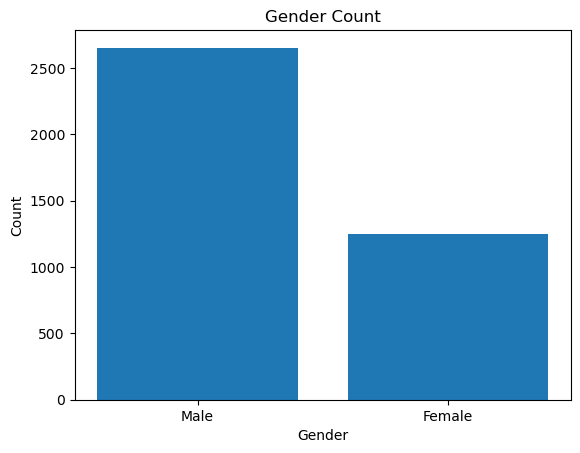

In [26]:
import matplotlib.pyplot as plt

plt.bar(gender_count.index,gender_count)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Count")

plt.show()

In [28]:
shopping.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [30]:
#Checking if there are any null values present in the dataset or not 
shopping.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [33]:
#Checking if there are any duplicate values present in the dataset or not 
shopping.duplicated().sum()

0

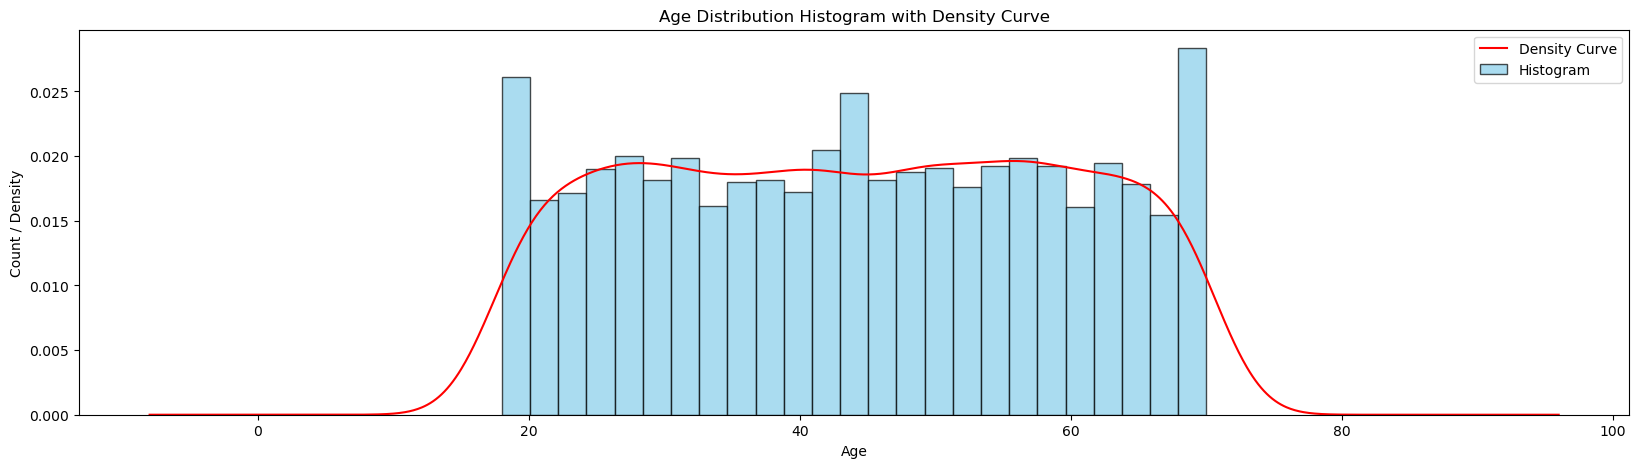

In [36]:
# graph forage distribution
fig, ax = plt.subplots(figsize = (20, 5))

ax.hist(shopping['Age'], bins = 25, edgecolor = 'black', alpha = 0.7, color = 'skyblue', density = True)
shopping['Age'].plot(kind = 'kde', color = 'red', ax = ax)

ax.set_xlabel('Age')
ax.set_ylabel('Count / Density')
ax.set_title('Age Distribution Histogram with Density Curve')
ax.legend(['Density Curve', 'Histogram'])
plt.show()

In [40]:
colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

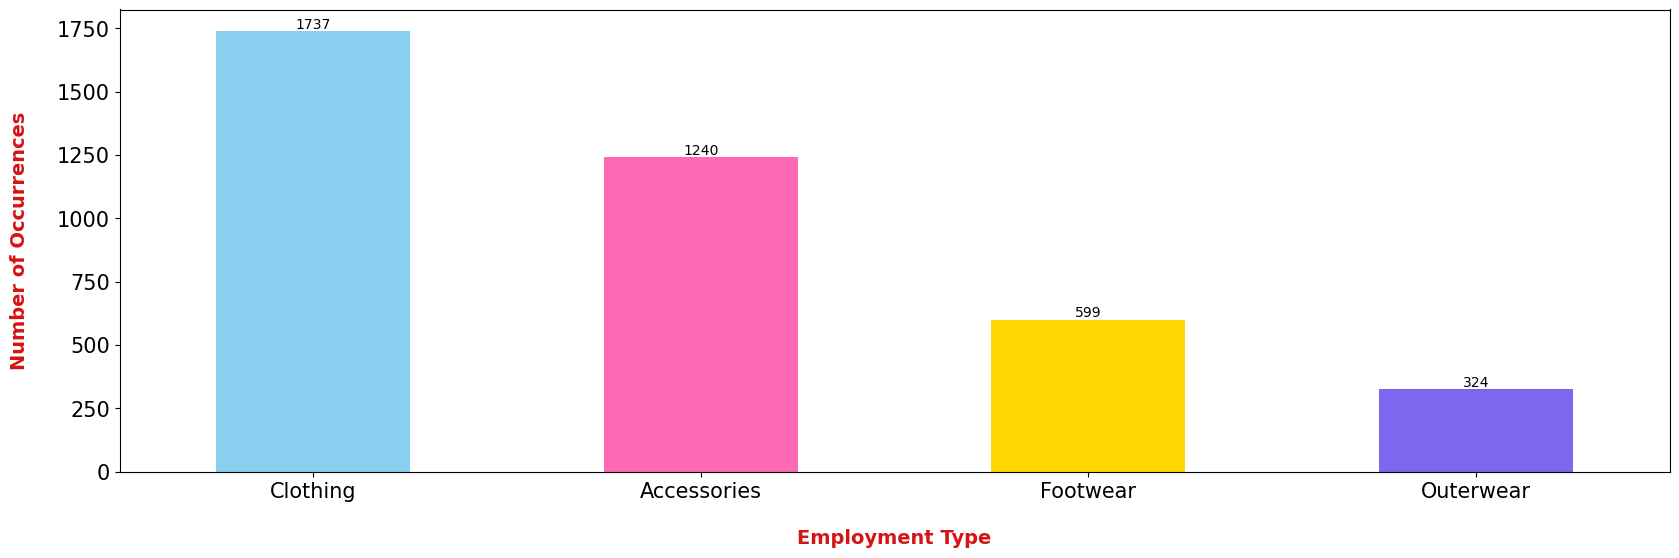

In [41]:
plt.figure(figsize = (20, 6))
ax = shopping["Category"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Clothing', 'Accessories', 'Footwear', 'Outerwear'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Employment Type', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);

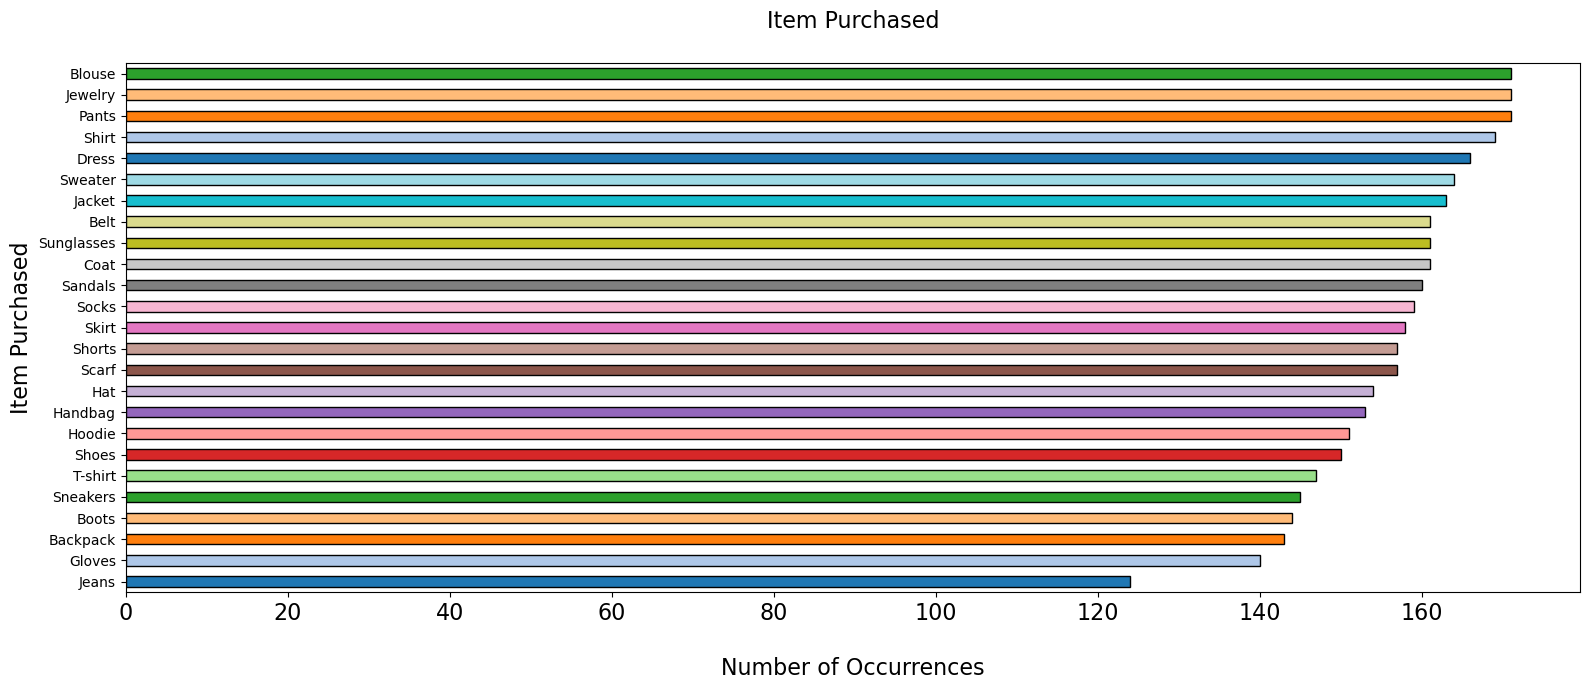

In [44]:
# histogram showing count of item purchased
import seaborn as sns

plt.figure(figsize = (16, 7))
shopping["Item Purchased"].value_counts().sort_values(ascending = True).plot(kind = 'barh', color = sns.color_palette('tab20'), edgecolor = 'black')
plt.ylabel('Item Purchased', fontsize = 16)
plt.xlabel('\nNumber of Occurrences', fontsize = 16)
plt.title('Item Purchased\n', fontsize = 16)
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

In [53]:
# who shops more?

total_purchase_by_gender = shopping.groupby('Gender')['Purchase Amount (USD)'].sum()
print("Total Purchase Amount by Gender:")
print(total_purchase_by_gender)

Total Purchase Amount by Gender:
Gender
Female     75191
Male      157890
Name: Purchase Amount (USD), dtype: int64


In [62]:
# locationwise shopping 
Location_shopping = shopping.groupby('Location')['Gender'].count()
print(Location_shopping)


Location
Alabama           89
Alaska            72
Arizona           65
Arkansas          79
California        95
Colorado          75
Connecticut       78
Delaware          86
Florida           68
Georgia           79
Hawaii            65
Idaho             93
Illinois          92
Indiana           79
Iowa              69
Kansas            63
Kentucky          79
Louisiana         84
Maine             77
Maryland          86
Massachusetts     72
Michigan          73
Minnesota         88
Mississippi       80
Missouri          81
Montana           96
Nebraska          87
Nevada            87
New Hampshire     71
New Jersey        67
New Mexico        81
New York          87
North Carolina    78
North Dakota      83
Ohio              77
Oklahoma          75
Oregon            74
Pennsylvania      74
Rhode Island      63
South Carolina    76
South Dakota      70
Tennessee         77
Texas             77
Utah              71
Vermont           85
Virginia          77
Washington        73
West

In [64]:
# How many customers have made a purchase in each category?
purchase_count_by_category = shopping['Category'].value_counts()
print("Purchase Count by Category:")
print(purchase_count_by_category)

Purchase Count by Category:
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: Category, dtype: int64
